Bài 1: Các bạn hiện thực lại mô hình Logistic Regression theo các hướng dẫn ở mục 2. Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.

In [1]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()

In [2]:
x = iris["data"][:, 3:] # chiều cao của hoa
y = (iris["target"] == 2).astype(np.int) # 1 nếu Iris-Virginica, 0 nếu không phải

C:\Users\marsen\AppData\Local\Temp\ipykernel_14956\457993268.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 nếu Iris-Virginica, 0 nếu không phải


In [3]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

Gradient descent 

In [4]:
intercept = np.ones((x.shape[0], 1))
X = np.concatenate((intercept, x), axis=1)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [6]:
def compute_loss(y_true, y_hat):
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

In [7]:
def compute_gradient(X, y_true, y_hat):
    return np.dot(X.T, (y_hat - y_true)) / len(y_true)


In [8]:
def initializers(X):
    X_features = X.shape[1]
    W = np.zeros((X_features,))
    return W


In [9]:
def fit(X, y_true, iter=100, alpha=0.1):
    w = initializers(X)
    for i in range(iter):
        z = np.dot(X, w)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        gradient = compute_gradient(X, y_true, y_hat)
        w = w - alpha * gradient
    return w

In [10]:
def predict(X_new, w):
    X_new_intercept = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)
    y_hat_new = sigmoid(np.dot(X_new_intercept, w))   
    # classify y_hat_new: class = 1 if y_hat_new >= 0.5 and = 0 if y_hat_new < 0.5
    return y_hat_new


In [11]:

y_hat_new = predict(X_new, fit(X, y))
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)


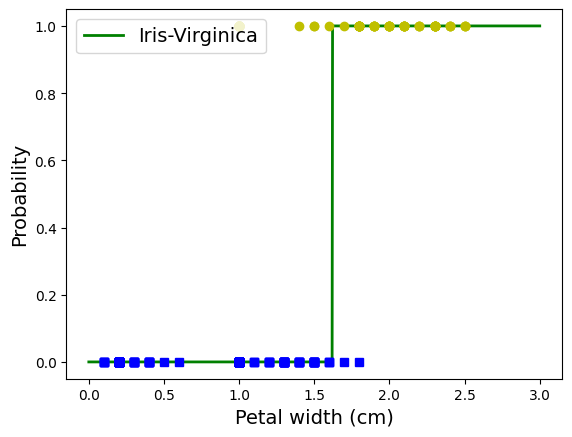

In [12]:
#analyze the result
import matplotlib.pyplot as plt
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Bài 2: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho 100 dòng dữ liệu
đầu tiên từ tập dữ liệu gốc. So sánh kết quả dự đoán với nhãn thực sự của dữ liệu.
Gợi ý: Để lấy ra 100 dòng dữ liệu đầu tiên, ta dùng lệnh: X[1:100] và y[1:100].
Có thể dùng accuracy_score để tính độ chính xác của dự đoán.

In [13]:
w=fit(X, y)
w

array([-1.21750324,  0.75168712])

In [14]:
y[1:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y_compare = predict(x, w)
y_compare = np.where(y_compare >= 0.5, 1, 0)



In [16]:
y_compare[1:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y[1:150], y_compare[1:150])

0.959731543624161

Bài 3: Trong Bước 6, với mỗi lần lặp để cập nhật trọng số, hãy tính giá trị hàm mất
mát của mỗi lần lặp và đưa vào list loss. Vẽ biểu đồ giá trị loss sau mỗi lần lặp.
Gợi ý: dùng hàm lineplot trong seaborn để vẽ biểu đồ giá trị của hàm loss sau mỗi lần
cập nhật trọng số. Tính giá trị hàm mất mát bằng hàm compute_loss ở Bước 3.

In [18]:
loss_list = []
def fit_spec(X, y_true, iter=100, alpha=0.1):
    w = initializers(X)
    for i in range(iter):
        z = np.dot(X, w)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        loss_list.append(loss)
        gradient = compute_gradient(X, y_true, y_hat)
        w = w - alpha * gradient
    return w

<AxesSubplot: >

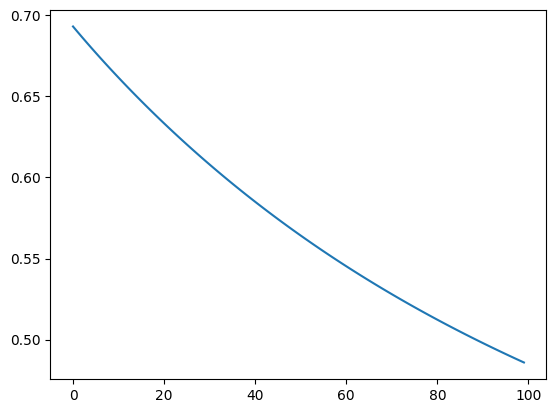

In [19]:
w= fit_spec(X, y, iter=100, alpha=0.1)
from seaborn import lineplot
lineplot(x=range(100), y=loss_list)

Bài 4: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new.

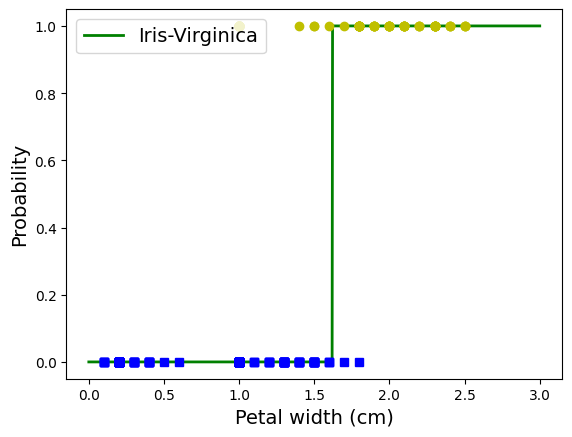

In [20]:
y_hat_new = predict(X_new, w)
#classify y_hat_new: class = 1 if y_hat_new >= 0.5 and = 0 if y_hat_new < 0.5
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()


Bài 5: Các bạn hãy dùng thư viện Logistic Regression trong sklearn để dự đoán, và so
sánh kết quả giữa dùng thư viện và làm bằng tay đối với Bài 2 và Bài 4

So sánh bài 4, giữa làm tay và hàm

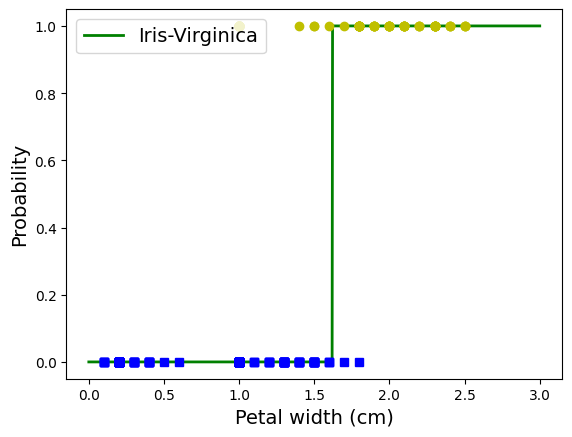

In [21]:
y_hat_new = predict(X_new, w)
#classify y_hat_new: class = 1 if y_hat_new >= 0.5 and = 0 if y_hat_new < 0.5
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()


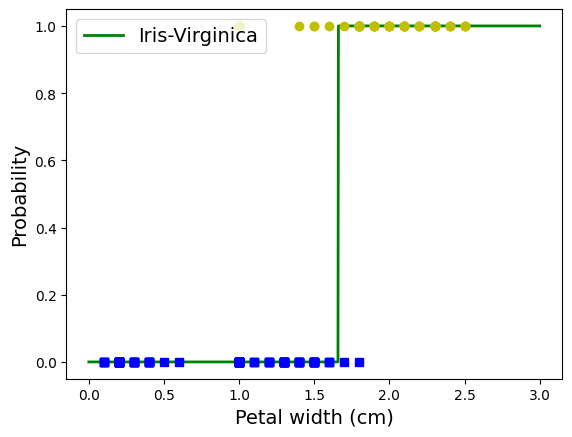

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)
y_proba = log_reg.predict_proba(X_new)
#classify y_proba: class = 1 if y_hat_new >= 0.5 and = 0 if y_hat_new < 0.5
y_proba = np.where(y_proba >= 0.5, 1, 0)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

So sánh bài 4, giữa làm tay và hàm:

In [23]:
y_compare = predict(x, w)
y_compare = np.where(y_compare >= 0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(y[1:150], y_compare[1:150])


0.959731543624161

In [24]:
y_compare_func= log_reg.predict(x)
accuracy_score(y[1:150], y_compare_func[1:150])

0.959731543624161

Bài 6*: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length và Sepal
Width để huấn luyện cho mô hình, và cho biết kết quả.

In [25]:
#get iris petal length, sepel length, petal width, sepal width
x_all= iris.data[:, :4]
#name of the features
iris.feature_names
y_test = (iris.target == 2).astype(np.int)


C:\Users\marsen\AppData\Local\Temp\ipykernel_14956\1859470987.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = (iris.target == 2).astype(np.int)


In [26]:
X_all = np.concatenate((np.ones((x_all.shape[0], 1)), x_all), axis=1)

Dùng hàm LogisticRegression của sklearn để huấn luyện

In [29]:
log_reg_all = LogisticRegression()
log_reg_all.fit(x_all, y_test)
y_proba_all = log_reg_all.predict_proba(x_all)
y_pred_all = (y_proba_all[:, 1] > 0.5).astype(int)



In [30]:
accuracy = accuracy_score(y_test, y_pred_all)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


Làm tay với 4 thuộc tính


In [33]:
w= fit_spec(X_all, y_test, iter=100, alpha=0.1)
y_compare_all = predict(x_all, w)
y_compare_all = np.where(y_compare_all >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_compare_all)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667
